In [1]:
import pandas as pd

# Load airbnb_price.csv, prices
prices = pd.read_csv("airbnb_price.csv")
# Load airbnb_room_type.xlsx, xls
room_types = pd.read_excel("airbnb_room_type.xlsx")
# Load airbnb_last_review.tsv, reviews
reviews = pd.read_csv("airbnb_last_review.tsv", sep="\t")

In [2]:
print(prices.head(), '\n', room_types.head(), '\n', reviews.head())

   listing_id        price                nbhood_full
0        2595  225 dollars         Manhattan, Midtown
1        3831   89 dollars     Brooklyn, Clinton Hill
2        5099  200 dollars     Manhattan, Murray Hill
3        5178   79 dollars  Manhattan, Hell's Kitchen
4        5238  150 dollars       Manhattan, Chinatown 
    listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt 
    listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  June 24 2019
4        5238          

In [16]:
print("Using [] to select dataframe, we have ", type(prices["price"]))
print("Using [[]] to select dataframe, we have ", type(prices[["price"]]))

Using [] to select dataframe, we have  <class 'pandas.core.series.Series'>
Using [[]] to select dataframe, we have  <class 'pandas.core.frame.DataFrame'>


In [3]:
# remove str "dollars"
prices['price'] = prices['price'].str.replace("dollars","")
# prices['price'] = prices['price'].apply(lambda x: x.replace("dollars",""))

prices['price'] = pd.to_numeric(prices['price'])


In [29]:
prices['price'] = prices['price'].str.replace("dollars","")
prices[["price"]] = pd.to_numeric(prices[["price"]])

TypeError: arg must be a list, tuple, 1-d array, or Series

In [4]:
print(prices['price'].describe())

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


In [27]:
print(prices['nbhood_full'].describe())

count                            25209
unique                             217
top       Brooklyn, Bedford-Stuyvesant
freq                              2209
Name: nbhood_full, dtype: object


### Calculate average price

In [5]:
# remove the data with price of 0
prices = prices.loc[prices['price']>0]
# take average of the pricing
avg_price = round(prices['price'].mean(),2)
print("The average price per night in NYC is ${} and {}.".format(avg_price, "nothing"))
print(f"The average price per night in NYC is ${avg_price} and nothing.")

The average price per night in NYC is $141.82 and nothing.
The average price per night in NYC is $141.82 and nothing.


#### Monthly price

In [6]:
prices['prices_per_month'] = prices['price'] * 365/12
avg_price_per_month = round(prices['prices_per_month'].mean(),2)
avg_price_per_month

4313.61

### Room type

In [7]:
room_types['room_type'].unique()

array(['Entire home/apt', 'private room', 'Private room',
       'entire home/apt', 'PRIVATE ROOM', 'shared room',
       'ENTIRE HOME/APT', 'Shared room', 'SHARED ROOM'], dtype=object)

In [51]:
set(room_types['room_type'])

{'ENTIRE HOME/APT',
 'Entire home/apt',
 'PRIVATE ROOM',
 'Private room',
 'SHARED ROOM',
 'Shared room',
 'entire home/apt',
 'private room',
 'shared room'}

In [8]:
room_types["room_type"] = room_types["room_type"].str.lower()
room_types['room_type'].unique()

array(['entire home/apt', 'private room', 'shared room'], dtype=object)

In [56]:
room_types['room_type'] = room_types['room_type'].astype("category")
room_types['room_type'].value_counts()

room_type
entire home/apt    13266
private room       11356
shared room          587
Name: count, dtype: int64

### Review

In [9]:
reviews['last_review'] = pd.to_datetime(reviews['last_review'])
reviews['last_review']

0       2019-05-21
1       2019-07-05
2       2019-06-22
3       2019-06-24
4       2019-06-09
           ...    
25204   2019-07-07
25205   2019-07-07
25206   2019-07-07
25207   2019-07-07
25208   2019-07-08
Name: last_review, Length: 25209, dtype: datetime64[ns]

In [10]:
# find the earliest and latest date of review

import datetime as dt
first_date = reviews['last_review'].dt.date.min()
last_date = reviews['last_review'].dt.date.max()
print(f"The review is from {first_date} to {last_date}")

The review is from 2019-01-01 to 2019-07-09


### Join the 3 tables together

In [11]:
rooms_and_prices = prices.merge(room_types, how='left', on="listing_id")
df_combine = rooms_and_prices.merge(reviews, how='left', on="listing_id") 

In [12]:
df_combine.head()

,listing_id,price,nbhood_full,prices_per_month,description,room_type,host_name,last_review
0,2595,225,"Manhattan, Midtown",6843.750000,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21
1,3831,89,"Brooklyn, Clinton Hill",2707.083333,Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,2019-07-05
2,5099,200,"Manhattan, Murray Hill",6083.333333,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,2019-06-22
3,5178,79,"Manhattan, Hell's Kitchen",2402.916667,Large Furnished Room Near B'way,private room,Shunichi,2019-06-24
4,5238,150,"Manhattan, Chinatown",4562.500000,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,2019-06-09


In [16]:
df_combine = df_combine[(df_combine['last_review'] > "2019-02-19") & (df_combine['price'] > 100)] # use '|' as or
df_combine

,listing_id,price,nbhood_full,prices_per_month,description,room_type,host_name,last_review
0,2595,225,"Manhattan, Midtown",6843.750000,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21
2,5099,200,"Manhattan, Murray Hill",6083.333333,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,2019-06-22
4,5238,150,"Manhattan, Chinatown",4562.500000,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,2019-06-09
5,5295,135,"Manhattan, Upper West Side",4106.250000,Beautiful 1br on Upper West Side,entire home/apt,Lena,2019-06-22
9,6848,140,"Brooklyn, Williamsburg",4258.333333,Only 2 stops to Manhattan studio,entire home/apt,Allen & Irina,2019-06-29
...,...,...,...,...,...,...,...,...
25192,36351128,110,"Manhattan, Upper West Side",3345.833333,"One bedroom without roomies, close to everything",entire home/apt,David & Amy,2019-07-05
25195,36411407,150,"Manhattan, Lower East Side",4562.500000,Brand new 1 bedroom steps from Soho!,entire home/apt,Mike,2019-07-06
25196,36413632,550,"Brooklyn, Brooklyn Heights",16729.166667,Spacious 2BR in Beautiful Brooklyn Heights,entire home/apt,Matt,2019-07-07
25197,36425863,129,"Manhattan, Upper East Side",3923.750000,Lovely Privet Bedroom with Privet Restroom,private room,Rusaa,2019-07-07


#### Breaking down by borough - 街区

In [21]:
df_combine['nbhood_full'].describe()
df_combine['borough'] = df_combine['nbhood_full'].str.partition(",")[0]


a = 'Manhattan, Midtown'
first = a.split(",")[1]
second = a.partition(",")[1]
print(f'{first} and {second}')

 Midtown and ,


In [24]:
set(df_combine['borough']) 

{'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'}

In [26]:
boroughs = df_combine.groupby('borough')['price'].agg(["sum", "mean", "median", "count"])

In [28]:
boroughs.round(3).sort_values("median", ascending=True)

,sum,mean,median,count
borough,,,,
Staten Island,10506,161.631,138.0,65
Bronx,21749,163.526,140.0,133
Queens,153492,178.479,150.0,860
Brooklyn,818845,191.812,155.0,4269
Manhattan,1536324,234.697,189.0,6546


#### Visualisation

Text(0.5, 1.0, 'Price distribution by Borough')

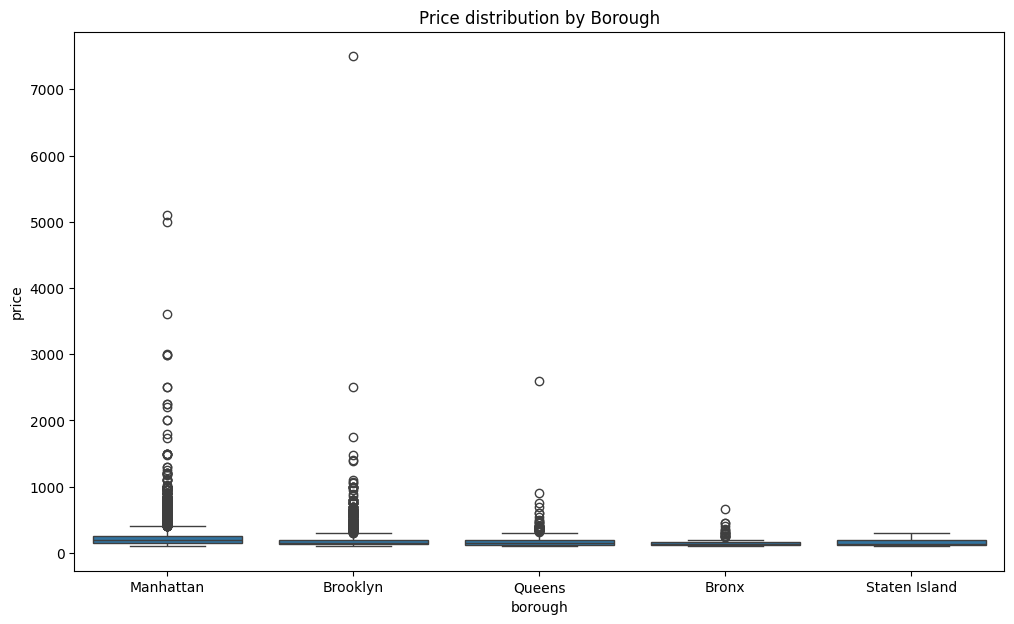

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.boxplot(x="borough", y="price", data = df_combine)
plt.title('Price distribution by Borough')

In [32]:
# removing the extreme values / outliers
price_mean = df_combine['price'].mean()
price_std = df_combine['price'].std()
df_filtered = df_combine[(df_combine['price'] < price_mean + 3 * price_std) &
                         (df_combine['price'] > price_mean - 3 * price_std)]

Text(0.5, 1.0, 'Price distribution by Borough after removing the outliers')

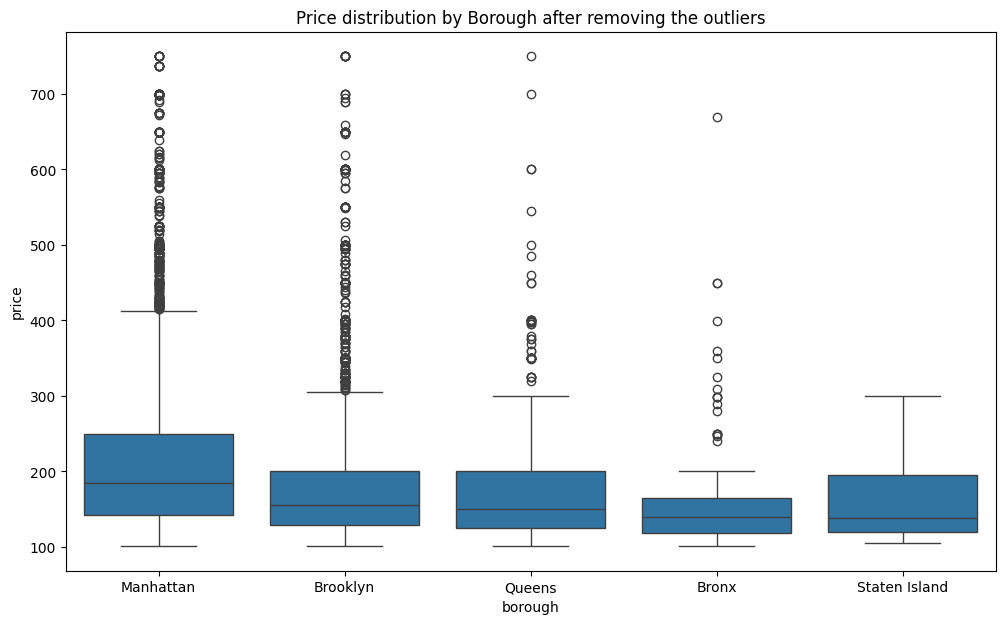

In [37]:
plt.figure(figsize=(12,7))
sns.boxplot(x="borough", y="price", data = df_filtered)
plt.title('Price distribution by Borough after removing the outliers')

In [35]:
set(df_filtered['room_type'])

{'entire home/apt', 'private room', 'shared room'}

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


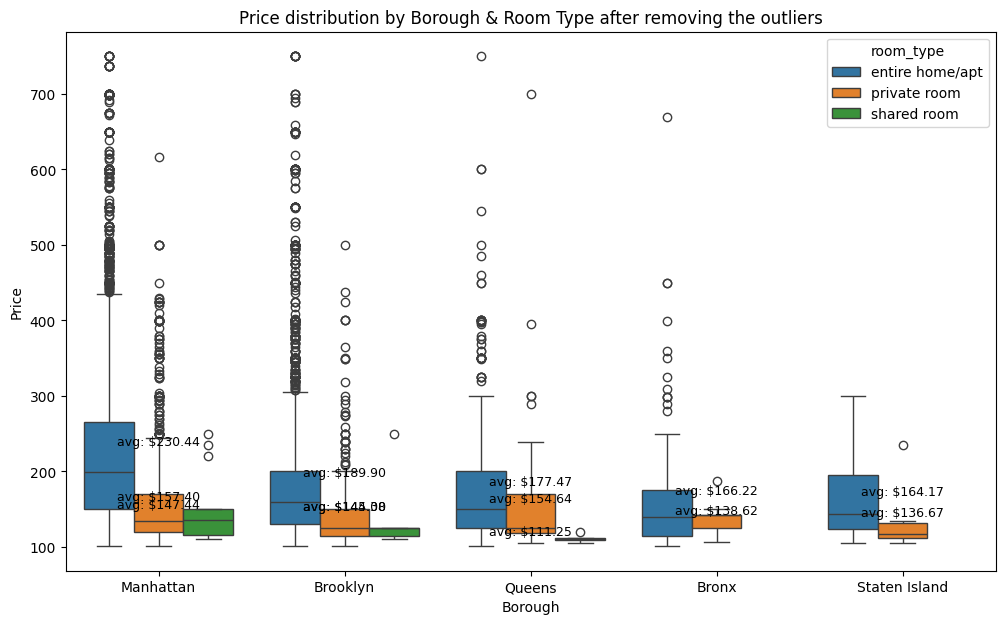

In [43]:
# adding room_type to display the difference

plt.figure(figsize=(12,7))
sns.boxplot(x="borough", y="price", hue='room_type', data = df_filtered)
plt.title('Price distribution by Borough & Room Type after removing the outliers')

for borough in df_filtered['borough'].unique():
    for room_type in df_filtered['room_type'].unique():
        avg_price = df_filtered[(df_filtered['borough'] == borough) & (df_filtered['room_type'] == room_type) ]['price'].mean()
        plt.text(borough, avg_price, f'avg: ${avg_price:.2f}', ha='center',va='bottom', fontsize=9)

plt.xlabel('Borough')
plt.ylabel('Price')
plt.show()